<a href="https://colab.research.google.com/github/springboardmentor2001-sudo/Smart-Energy-Consumption-Analysis-and-Prediction/blob/nithin-kamatam/Smart_Energy_Consumption_Analysis_and_Prediction_Feature_engineering_%26_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np


df = pd.read_csv('Energy_consumption.csv')

print(df.head())


print(df.info())
print(df.describe())


print(df.isnull().sum())

             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732  
<class 'pandas

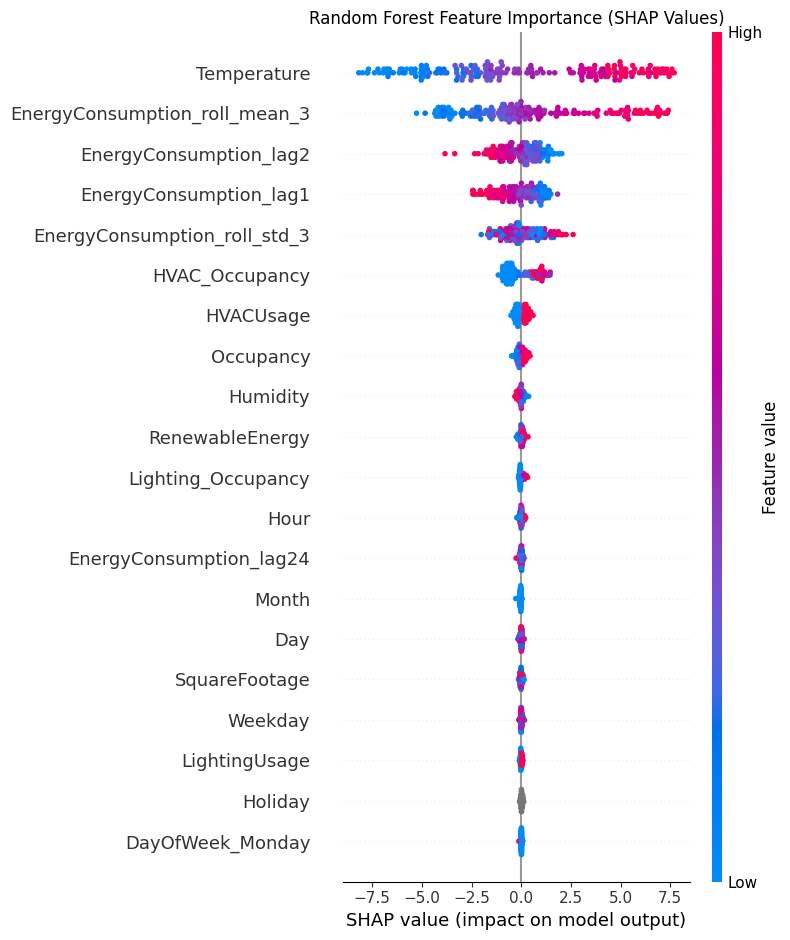

In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure the model is fit (it was in EZeXxm0ie5Ir)
# rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_full.fit(X_train, y_train)

# Ensure explainer and shap_values are computed (they were in EZeXxm0ie5Ir)
# explainer = shap.TreeExplainer(rf_full)
# shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for the Random Forest model
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)
plt.title('Random Forest Feature Importance (SHAP Values)')
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert categorical columns to category dtype
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Standardize binary categorical variables
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

# Check for outliers using z-score
from scipy.stats import zscore
numerical_cols = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']
z_scores = np.abs(df[numerical_cols].apply(zscore))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")

# Optionally, remove outliers for modeling
df_clean = df[~outliers].copy()

Number of outlier rows: 0


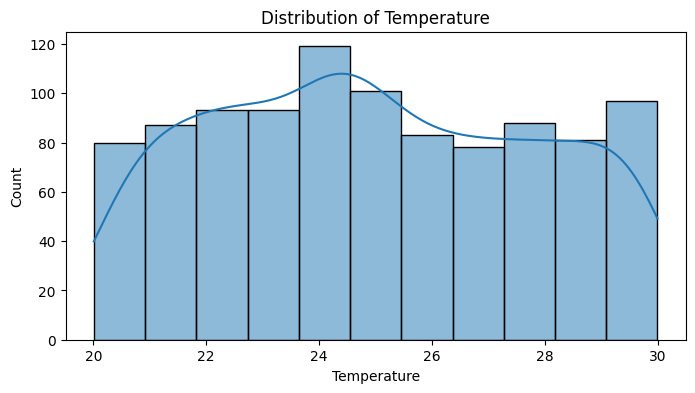

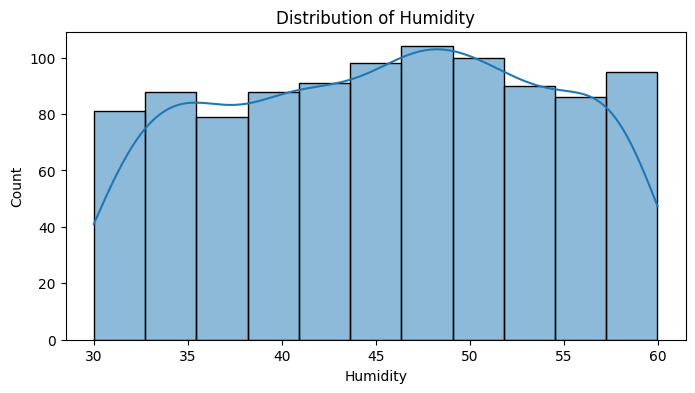

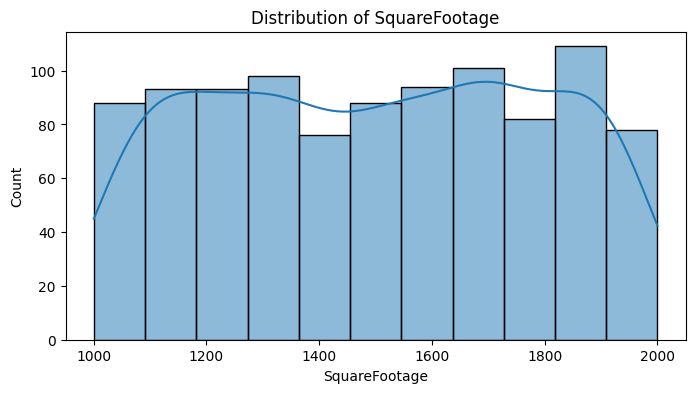

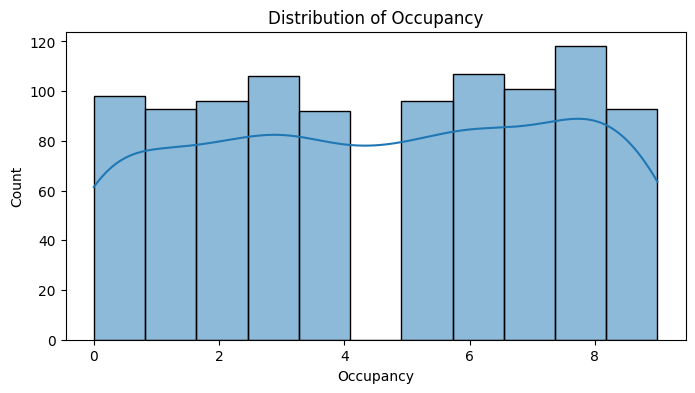

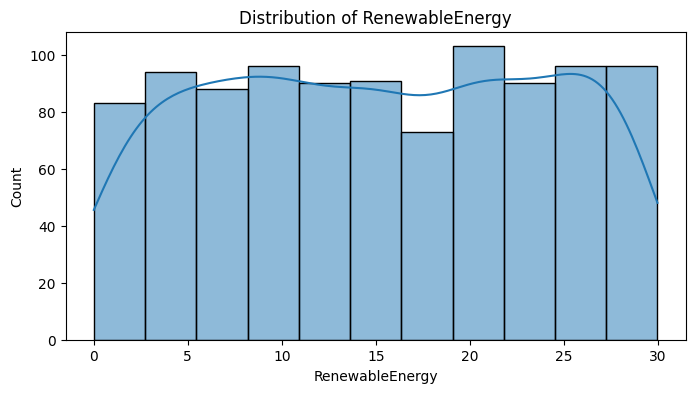

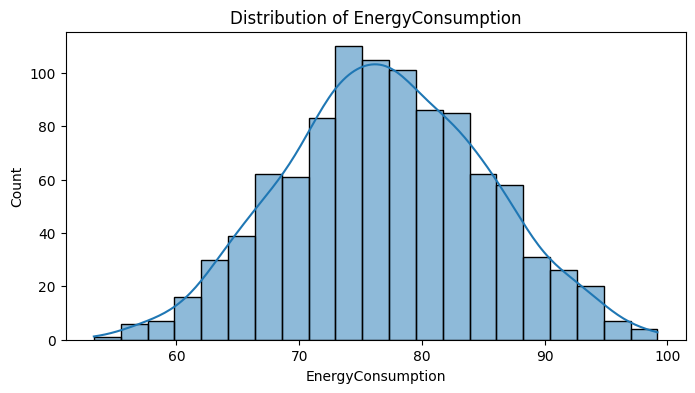

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



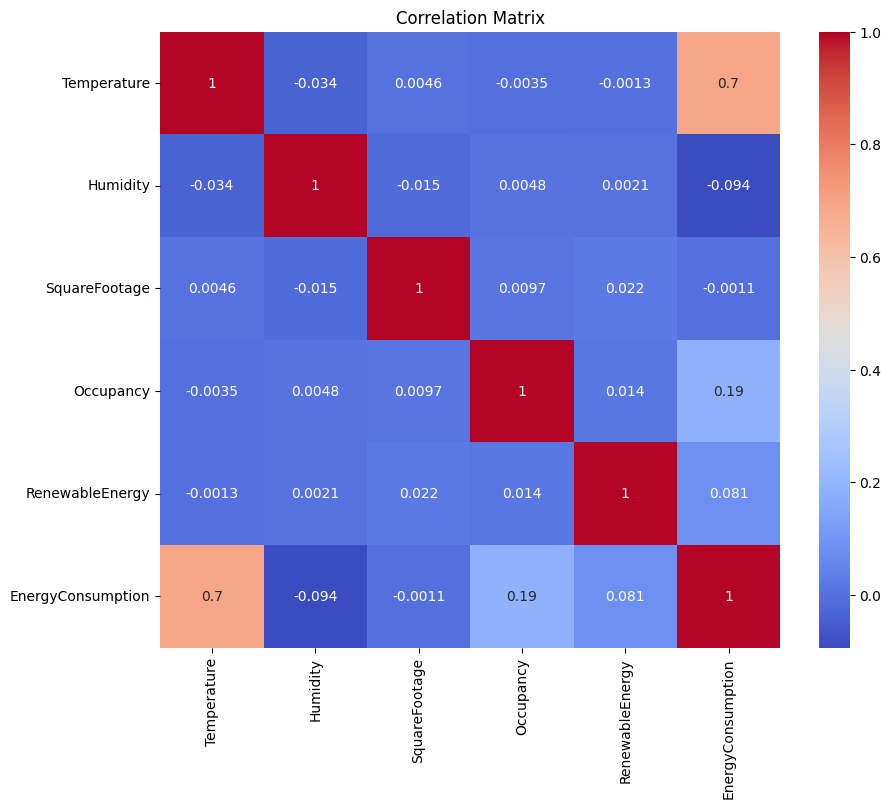

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



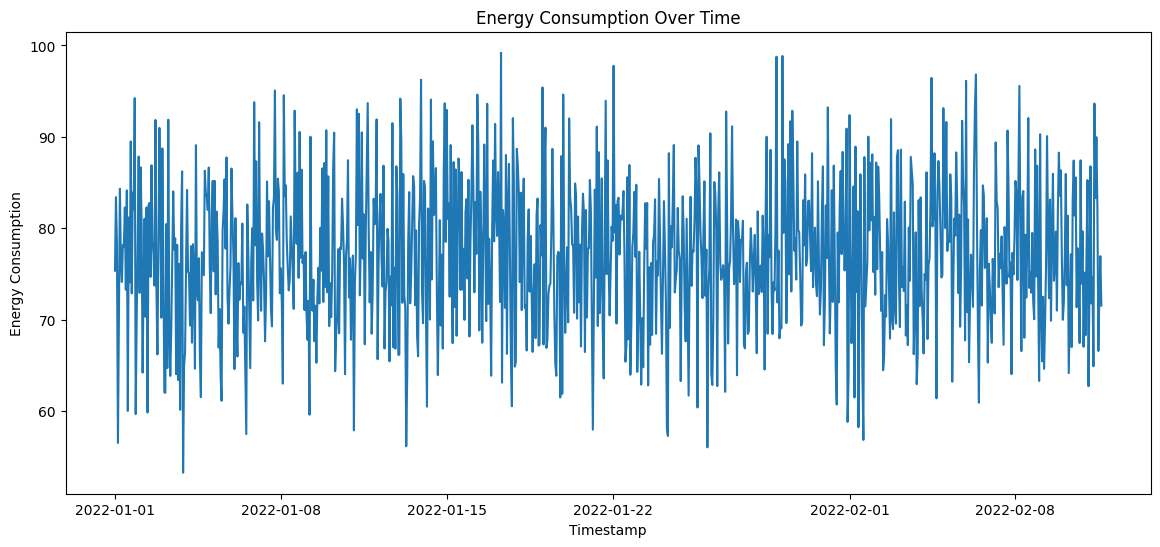

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_clean['Timestamp'], df_clean['EnergyConsumption'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.show()



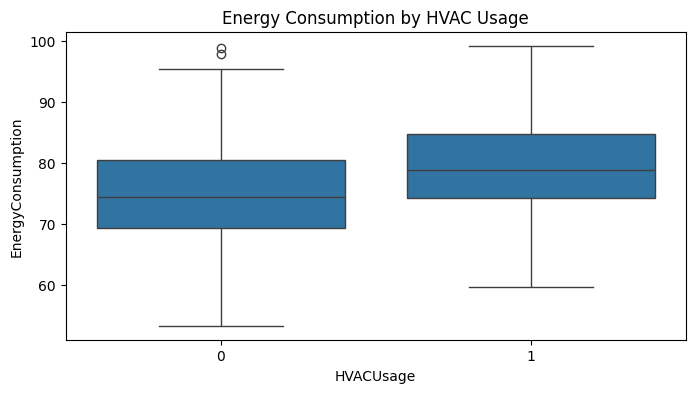

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='HVACUsage', y='EnergyConsumption', data=df_clean)
plt.title('Energy Consumption by HVAC Usage')
plt.show()



### Cell 3iXsEFhBboP7: Initial Data Loading and Inspection

This cell is responsible for loading the dataset and performing an initial inspection to understand its structure, data types, and check for missing values. It uses `pandas` for data manipulation and `numpy` for numerical operations.

*   **`import pandas as pd`**: Imports the pandas library, aliasing it as `pd` for convenient use.
*   **`import numpy as np`**: Imports the numpy library, aliasing it as `np`.
*   **`df = pd.read_csv('Energy_consumption.csv')`**: Reads the 'Energy_consumption.csv' file into a pandas DataFrame named `df`.
*   **`print(df.head())`**: Displays the first 5 rows of the DataFrame, giving a quick overview of the data's content and format.
*   **`print(df.info())`**: Prints a concise summary of the DataFrame, including the number of entries, number of columns, non-null values for each column, and data types. This is crucial for identifying missing values and incorrect data types.
*   **`print(df.describe())`**: Generates descriptive statistics for numerical columns, showing count, mean, standard deviation, min, max, and quartiles. This helps in understanding the distribution and spread of numerical features.
*   **`print(df.isnull().sum())`**: Calculates and displays the total number of missing values for each column. This helps confirm whether there are any null values that need to be addressed.

### Cell fcNGNEjQcT34: Data Preprocessing and Outlier Detection

This cell focuses on cleaning and preprocessing the data by converting data types, standardizing categorical variables, and checking for outliers. This step is essential for preparing the data for model training.

*   **`df['Timestamp'] = pd.to_datetime(df['Timestamp'])`**: Converts the 'Timestamp' column from an object (string) type to a datetime object, enabling time-series specific operations.
*   **`categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']`**: Defines a list of columns identified as categorical.
*   **`for col in categorical_cols: df[col] = df[col].astype('category')`**: Iterates through the specified categorical columns and converts their data type to 'category'. This can save memory and improve performance for categorical operations.
*   **`df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})`**: Maps the 'On' and 'Off' string values in the 'HVACUsage' column to numerical binary values (1 and 0), respectively, for easier processing by machine learning models.
*   **`df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})`**: Performs the same binary mapping for the 'LightingUsage' column.
*   **`df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})`**: Maps 'Yes' and 'No' in the 'Holiday' column to binary values (1 and 0).
*   **`from scipy.stats import zscore`**: Imports the `zscore` function from the `scipy.stats` module for outlier detection.
*   **`numerical_cols = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']`**: Defines a list of numerical columns for outlier detection.
*   **`z_scores = np.abs(df[numerical_cols].apply(zscore))`**: Calculates the absolute z-score for each value in the numerical columns. Z-scores measure how many standard deviations an observation is from the mean.
*   **`outliers = (z_scores > 3).any(axis=1)`**: Identifies rows where any numerical feature has an absolute z-score greater than 3, classifying them as outliers. This is a common heuristic for outlier detection.
*   **`print(f"Number of outlier rows: {outliers.sum()}")`**: Prints the total count of identified outlier rows.
*   **`df_clean = df[~outliers].copy()`**: Creates a new DataFrame `df_clean` by excluding the identified outlier rows, ensuring that subsequent analysis and modeling are performed on cleaned data.

### Cell mUaUnigKOhii: Numerical Feature Distribution Visualization

This cell generates histograms for each numerical column in the cleaned DataFrame (`df_clean`). Histograms are valuable for understanding the distribution, central tendency, spread, and potential skewness of numerical variables.

*   **`import matplotlib.pyplot as plt`**: Imports the `matplotlib.pyplot` library, commonly aliased as `plt`, for creating static, interactive, and animated visualizations in Python.
*   **`import seaborn as sns`**: Imports the `seaborn` library, aliased as `sns`, which is built on Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
*   **`for col in numerical_cols:`**: Loops through each column name specified in the `numerical_cols` list (defined in a previous cell).
*   **`plt.figure(figsize=(8, 4))`**: Creates a new figure for each plot with a specified size of 8 inches wide by 4 inches tall. This ensures that each histogram is displayed independently and has a consistent layout.
*   **`sns.histplot(df_clean[col], kde=True)`**: Generates a histogram for the current numerical column (`col`) from the `df_clean` DataFrame. The `kde=True` argument overlays a Kernel Density Estimate (KDE) curve, which provides a smoothed representation of the data distribution, helping to visualize its shape more clearly.
*   **`plt.title(f'Distribution of {col}')`**: Sets the title of each plot to indicate which numerical feature's distribution is being displayed.
*   **`plt.show()`**: Displays the generated plot. In an interactive environment like Colab, this renders the plot immediately. This command is called inside the loop, so a separate plot is shown for each numerical column.

### Cell r25Qqxc2cpWQ: Energy Consumption by HVAC Usage

This cell generates a box plot to visualize the relationship between 'HVACUsage' (On or Off) and 'EnergyConsumption'. Box plots are excellent for comparing the distribution of a numerical variable across different categories.

*   **`plt.figure(figsize=(8, 4))`**: Creates a new figure for the box plot with a specified size.
*   **`sns.boxplot(x='HVACUsage', y='EnergyConsumption', data=df_clean)`**: Generates the box plot:
    *   **`x='HVACUsage'`**: Sets 'HVACUsage' on the x-axis, representing the categories (On/Off).
    *   **`y='EnergyConsumption'`**: Sets 'EnergyConsumption' on the y-axis, showing its distribution within each HVAC usage category.
    *   **`data=df_clean`**: Specifies that the data comes from the `df_clean` DataFrame.
*   **`plt.title('Energy Consumption by HVAC Usage')`**: Sets the title of the plot.
*   **`plt.show()`**: Displays the generated box plot.

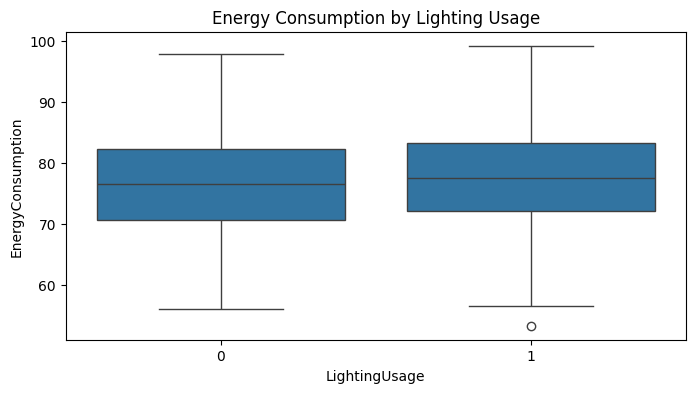

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='LightingUsage', y='EnergyConsumption', data=df_clean)
plt.title('Energy Consumption by Lighting Usage')
plt.show()



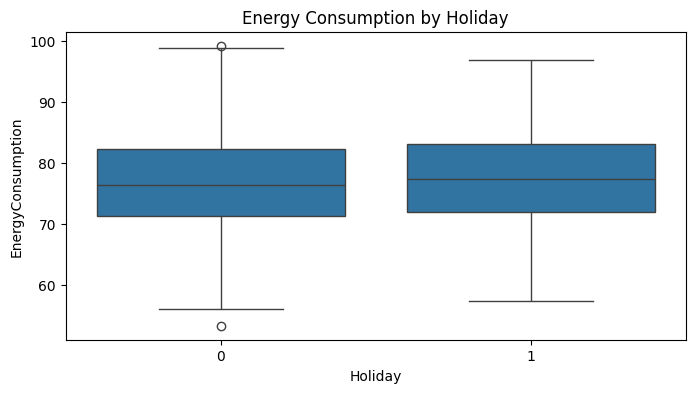

In [ ]:
# Boxplot: Energy consumption by Holiday
plt.figure(figsize=(8, 4))
sns.boxplot(x='Holiday', y='EnergyConsumption', data=df_clean)
plt.title('Energy Consumption by Holiday')
plt.show()

In [ ]:
# Datetime features
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Day'] = df_clean['Timestamp'].dt.day
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Weekday'] = df_clean['Timestamp'].dt.weekday
df_clean['Weekend'] = (df_clean['Weekday'] >= 5).astype(int)



In [ ]:
# Lag features
for lag in [1, 2, 24]:
    df_clean[f'EnergyConsumption_lag{lag}'] = df_clean['EnergyConsumption'].shift(lag)



In [ ]:
# Rolling features
df_clean['EnergyConsumption_roll_mean_3'] = df_clean['EnergyConsumption'].rolling(window=3).mean()
df_clean['EnergyConsumption_roll_std_3'] = df_clean['EnergyConsumption'].rolling(window=3).std()



In [ ]:
# Interaction features
df_clean['HVACUsage'] = df_clean['HVACUsage'].astype(int)
df_clean['LightingUsage'] = df_clean['LightingUsage'].astype(int)
df_clean['HVAC_Occupancy'] = df_clean['HVACUsage'] * df_clean['Occupancy']
df_clean['Lighting_Occupancy'] = df_clean['LightingUsage'] * df_clean['Occupancy']
# One-hot encoding for DayOfWeek
df_clean = pd.get_dummies(df_clean, columns=['DayOfWeek'], drop_first=True)

# Drop rows with NaN from lag/rolling features
df_fe = df_clean.dropna().copy()

In [ ]:
# Baseline: Naive prediction (previous hour)
df_fe['EnergyConsumption_pred_naive'] = df_fe['EnergyConsumption_lag1']
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_naive = mean_absolute_error(df_fe['EnergyConsumption'], df_fe['EnergyConsumption_pred_naive'])
mse_naive = mean_squared_error(df_fe['EnergyConsumption'], df_fe['EnergyConsumption_pred_naive'])
r2_naive = r2_score(df_fe['EnergyConsumption'], df_fe['EnergyConsumption_pred_naive'])

print(f"Naive Baseline MAE: {mae_naive:.2f}")
print(f"Naive Baseline MSE: {mse_naive:.2f}")
print(f"Naive Baseline R2: {r2_naive:.4f}")

Naive Baseline MAE: 9.38
Naive Baseline MSE: 131.17
Naive Baseline R2: -0.9882


In [ ]:
# Time-aware train-test split (last 20% for test)
split_idx = int(len(df_fe) * 0.8)
train = df_fe.iloc[:split_idx]
test = df_fe.iloc[split_idx:]

features = [
    'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage',
    'RenewableEnergy', 'Holiday', 'Hour', 'Day', 'Month', 'Weekday', 'Weekend',
    'EnergyConsumption_lag1', 'EnergyConsumption_lag2', 'EnergyConsumption_lag24',
    'EnergyConsumption_roll_mean_3', 'EnergyConsumption_roll_std_3',
    'HVAC_Occupancy', 'Lighting_Occupancy'
] + [col for col in df_fe.columns if col.startswith('DayOfWeek_')]

X_train = train[features]
y_train = train['EnergyConsumption']
X_test = test[features]
y_test = test['EnergyConsumption']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2: {r2_rf:.4f}")

Random Forest MAE: 2.74
Random Forest MSE: 11.90
Random Forest R2: 0.8057


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MAE: {mae_gbr:.2f}")
print(f"Gradient Boosting MSE: {mse_gbr:.2f}")
print(f"Gradient Boosting R2: {r2_gbr:.4f}")

Gradient Boosting MAE: 1.83
Gradient Boosting MSE: 6.20
Gradient Boosting R2: 0.8988


In [ ]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df_fe[['Timestamp', 'EnergyConsumption']].rename(columns={'Timestamp': 'ds', 'EnergyConsumption': 'y'})
split_idx_prophet = int(len(df_prophet) * 0.8)
train_prophet = df_prophet.iloc[:split_idx_prophet]
test_prophet = df_prophet.iloc[split_idx_prophet:]

model_prophet = Prophet()
model_prophet.fit(train_prophet)

future = model_prophet.make_future_dataframe(periods=len(test_prophet), freq='H')
forecast = model_prophet.predict(future)
y_pred_prophet = forecast['yhat'].iloc[-len(test_prophet):].values

mae_prophet = mean_absolute_error(test_prophet['y'], y_pred_prophet)
mse_prophet = mean_squared_error(test_prophet['y'], y_pred_prophet)
r2_prophet = r2_score(test_prophet['y'], y_pred_prophet)

print(f"Prophet MAE: {mae_prophet:.2f}")
print(f"Prophet MSE: {mse_prophet:.2f}")
print(f"Prophet R2: {r2_prophet:.4f}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Prophet MAE: 6.39
Prophet MSE: 61.75
Prophet R2: -0.0089


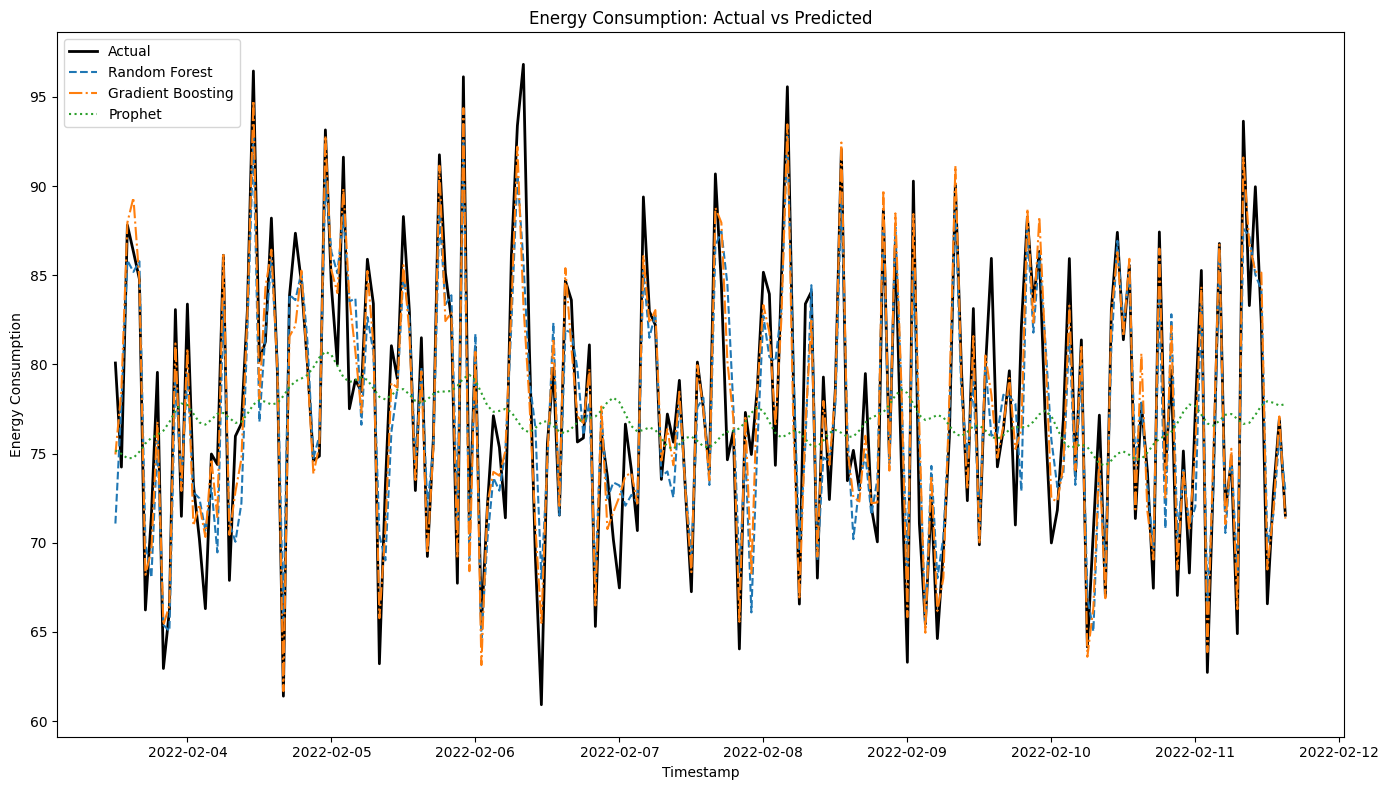

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Random Forest, Gradient Boosting, and Prophet on test data

plt.figure(figsize=(14, 8))

# Actual values
plt.plot(test['Timestamp'], y_test, label='Actual', color='black', linewidth=2)

# Predictions
plt.plot(test['Timestamp'], y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(test['Timestamp'], y_pred_gbr, label='Gradient Boosting', linestyle='-.')
plt.plot(test['Timestamp'], y_pred_prophet, label='Prophet', linestyle=':')

plt.title('Energy Consumption: Actual vs Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
rf_mae_scores = []
rf_mse_scores = []
rf_r2_scores = []

for train_idx, test_idx in tscv.split(df_fe):
    X_tr, X_te = df_fe.iloc[train_idx][features], df_fe.iloc[test_idx][features]
    y_tr, y_te = df_fe.iloc[train_idx]['EnergyConsumption'], df_fe.iloc[test_idx]['EnergyConsumption']
    rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_cv.fit(X_tr, y_tr)
    y_pred_cv = rf_cv.predict(X_te)
    rf_mae_scores.append(mean_absolute_error(y_te, y_pred_cv))
    rf_mse_scores.append(mean_squared_error(y_te, y_pred_cv))
    rf_r2_scores.append(r2_score(y_te, y_pred_cv))

print(f"TimeSeriesSplit RF MAE: {np.mean(rf_mae_scores):.2f} ± {np.std(rf_mae_scores):.2f}")
print(f"TimeSeriesSplit RF MSE: {np.mean(rf_mse_scores):.2f} ± {np.std(rf_mse_scores):.2f}")
print(f"TimeSeriesSplit RF R2: {np.mean(rf_r2_scores):.4f} ± {np.std(rf_r2_scores):.4f}")



TimeSeriesSplit RF MAE: 3.21 ± 0.42
TimeSeriesSplit RF MSE: 16.69 ± 3.86
TimeSeriesSplit RF R2: 0.7455 ± 0.0470


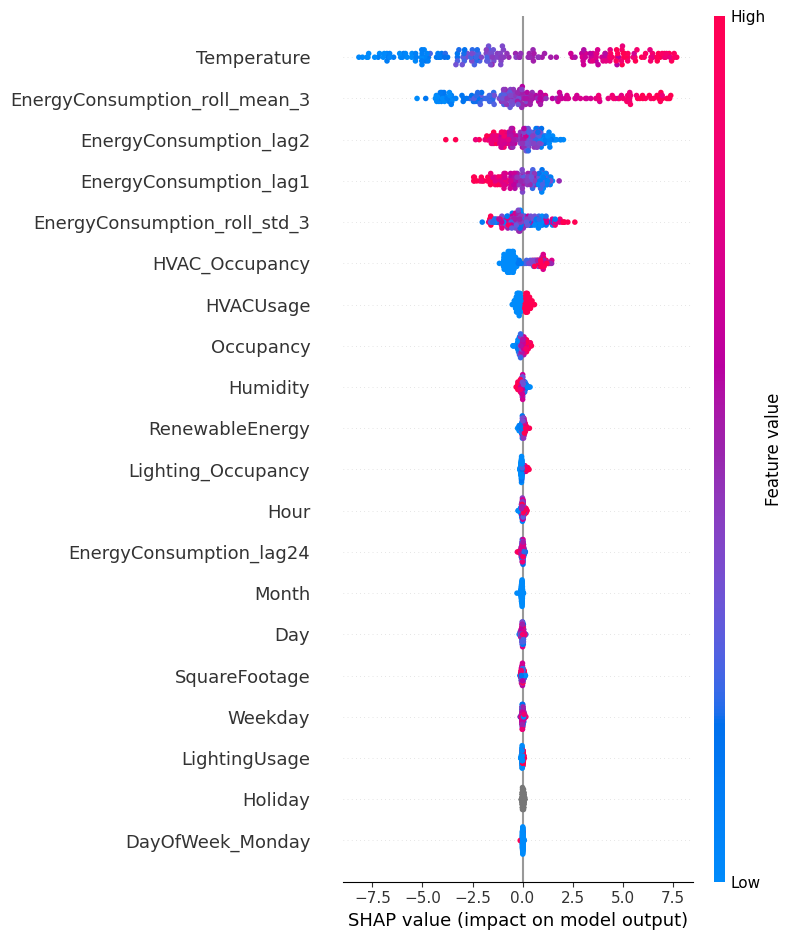

In [ ]:
import shap

# Fit model on full training data
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf_full)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
# Drop Timestamp and the target variable for scaling features
features_to_scale = [col for col in features if col not in ['Timestamp', 'EnergyConsumption']]

# Initialize a separate scaler for features and the target variable
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train[features_to_scale])
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled = scaler_X.transform(X_test[features_to_scale])
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape input to be 3D [samples, timesteps, features]
# For this example, we consider each timestep as a single point, so timesteps = 1
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test_scaled shape:", y_test_scaled.shape)

X_train_scaled shape: (780, 1, 26)
y_train_scaled shape: (780, 1)
X_test_scaled shape: (196, 1, 26)
y_test_scaled shape: (196, 1)



To implement the LSTM model, I'll define its architecture using Keras. This will include LSTM layers, Dense layers for output, and Dropout for regularization. I'll also set up callbacks for early stopping and learning rate reduction during training.

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('best_lstm.h5', save_best_only=True, monitor='val_loss', mode='min')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

model.summary()
```

**Reasoning**:
The subtask requires defining the architecture of an LSTM model, including importing necessary Keras modules, building the sequential model with LSTM and Dropout layers, compiling it with an optimizer and loss function, defining callbacks for early stopping, learning rate reduction, and model checkpointing, and finally, printing the model summary.



## Define_LSTM_Model

### Subtask:
Define the architecture of the LSTM model using Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Get input shape from X_train_scaled
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

# Instantiate a Sequential model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
# Add a Dropout layer
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=64, return_sequences=False))
# Add another Dropout layer
model.add(Dropout(0.2))

# Add a Dense output layer
model.add(Dense(units=1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint('best_lstm.h5', monitor='val_loss', save_best_only=True, mode='min')

# Group callbacks into a list
callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Print the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,385 (220.25 KB)

 Trainable params: 56,385 (220.25 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code generated a Keras UserWarning about passing `input_shape` directly to the first layer in a Sequential model. To follow best practices and remove the warning, I will explicitly add an `Input` layer as the first layer in the model.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
model = Sequential()
model.add(Input(shape=input_shape))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

model_checkpoint = ModelCheckpoint('best_lstm.h5', monitor='val_loss', save_best_only=True, mode='min')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,385 (220.25 KB)

 Trainable params: 56,385 (220.25 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The subtask requires training the LSTM model using the scaled training data, including validation data, epochs, batch size, and callbacks, and storing the training history.



In [ ]:
EPOCHS = 50
BATCH_SIZE = 64

history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=callbacks,
    verbose=1
)

print("LSTM model training complete.")

Epoch 1/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - loss: 0.2970

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2734 - val_loss: 0.1705 - learning_rate: 0.0010
Epoch 2/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2094

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1268 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0313 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 4/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0250

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0263 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 5/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0260

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0256 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 6/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0168

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0218 - val_loss: 0.0191 - learning_rate: 0.0010
Epoch 7/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0229

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0225 - val_loss: 0.0182 - learning_rate: 0.0010
Epoch 8/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0222

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0211 - val_loss: 0.0171 - learning_rate: 0.0010
Epoch 9/50
 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0203 - val_loss: 0.0159 - learning_rate: 0.0010
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0199 - val_loss: 0.0149 - learning_rate: 0.0010
Epoch 11/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0152

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0167 - val_loss: 0.0135 - learning_rate: 0.0010
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0170 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 13/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149 - val_loss: 0.0121 - learning_rate: 0.0010
Epoch 14/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0160

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0147 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 15/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0133 - val_loss: 0.0113 - learning_rate: 0.0010
Epoch 16/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0142

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - val_loss: 0.0112 - learning_rate: 0.0010
Epoch 17/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0130

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0132 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 18/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0132

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0133 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 19/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0113

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0122 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 20/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 21/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 22/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0122 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 23/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0128 - val_loss: 0.0099 - learning_rate: 0.0010
Epoch 24/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0107

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0119 - val_loss: 0.0099 - learning_rate: 0.0010
Epoch 25/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 26/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0131

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 27/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0105 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 28/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0107 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 29/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0126

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0116 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 30/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 31/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0132

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0114 - val_loss: 0.0089 - learning_rate: 0.0010
Epoch 32/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0104 - val_loss: 0.0090 - learning_rate: 0.0010
Epoch 33/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0103 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 34/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - val_loss: 0.0090 - learning_rate: 0.0010
Epoch 35/50
 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 36/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 37/50
10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098  

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 38/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 39/50
 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 40/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 41/50
 8/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0094 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 42/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0152

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0113 - val_loss: 0.0078 - learning_rate: 0.0010
Epoch 43/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098 - val_loss: 0.0078 - learning_rate: 0.0010
Epoch 44/50
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 45/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0088 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 46/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0061

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 47/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0082 - val_loss: 0.0070 - learning_rate: 0.0010
Epoch 48/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 49/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0067 - learning_rate: 0.0010
Epoch 50/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0070

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0077 - val_loss: 0.0066 - learning_rate: 0.0010
LSTM model training complete.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


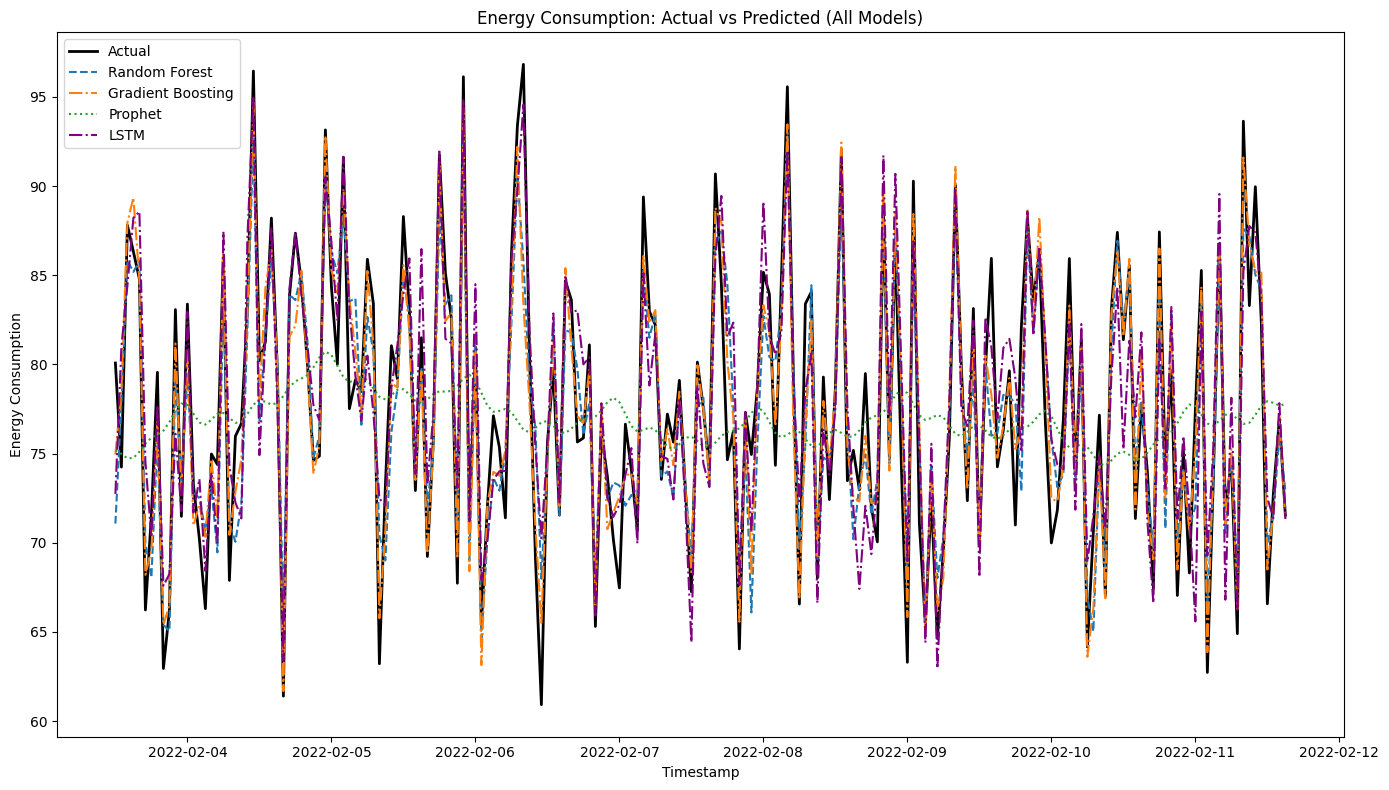

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Random Forest, Gradient Boosting, Prophet, and LSTM on test data

plt.figure(figsize=(14, 8))

# Make predictions on the scaled test data
y_pred_lstm_scaled = model.predict(X_test_scaled)
# Inverse transform the predictions to original scale
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)


plt.plot(test['Timestamp'], y_test, label='Actual', color='black', linewidth=2)

plt.plot(test['Timestamp'], y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(test['Timestamp'], y_pred_gbr, label='Gradient Boosting', linestyle='-.')
plt.plot(test['Timestamp'], y_pred_prophet, label='Prophet', linestyle=':')
plt.plot(test['Timestamp'], y_pred_lstm, label='LSTM', linestyle='-.', color='purple')

plt.title('Energy Consumption: Actual vs Predicted (All Models)')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.tight_layout()
plt.show()

**Reasoning**:
The next logical step after training the LSTM model is to evaluate its performance on the scaled test data. This involves making predictions and then calculating relevant metrics like MAE, MSE, and R2 score to assess how well the model generalizes.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lstm_scaled = model.predict(X_test_scaled)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)
mae_lstm = mean_absolute_error(y_test_unscaled, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_unscaled, y_pred_lstm)
r2_lstm = r2_score(y_test_unscaled, y_pred_lstm)

print(f"LSTM MAE: {mae_lstm:.2f}")
print(f"LSTM MSE: {mse_lstm:.2f}")
print(f"LSTM R2: {r2_lstm:.4f}")

results = {
    'Model': ['Naive', 'Random Forest', 'Gradient Boosting', 'Prophet', 'LSTM'],
    'MAE': [mae_naive, mae_rf, mae_gbr, mae_prophet, mae_lstm],
    'MSE': [mse_naive, mse_rf, mse_gbr, mse_prophet, mse_lstm],
    'R2': [r2_naive, r2_rf, r2_gbr, r2_prophet, r2_lstm]
}
results_df = pd.DataFrame(results)
print("\nComparison of Models:")
print(results_df.round(4))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
LSTM MAE: 3.01
LSTM MSE: 13.88
LSTM R2: 0.7732

Comparison of Models:
               Model     MAE       MSE      R2
0              Naive  9.3819  131.1745 -0.9882
1      Random Forest  2.7383   11.8954  0.8057
2  Gradient Boosting  1.8257    6.1959  0.8988
3            Prophet  6.3876   61.7532 -0.0089
4               LSTM  3.0136   13.8848  0.7732


In [ ]:
import lightgbm as lgb


train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 64,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}


model = lgb.train(params,
                  train_data,
                  valid_sets=[train_data, test_data],
                  num_boost_round=1000,
                  callbacks=[lgb.early_stopping(50)])

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[383]	training's rmse: 0.391022	valid_1's rmse: 2.31545


In [ ]:
# Predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mbe = np.mean(y_test - y_pred)

print(f'LightGBM RMSE: {rmse:.4f}')
print(f'LightGBM MAE: {mae:.4f}')
print(f'LightGBM MBE: {mbe:.4f}')

LightGBM RMSE: 2.3154
LightGBM MAE: 1.7091
LightGBM MBE: 0.3082


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mbe = np.mean(y_test - y_pred)
r2 = r2_score(y_test, y_pred)

print(f'LightGBM RMSE: {rmse:.4f}')
print(f'LightGBM MAE: {mae:.4f}')
print(f'LightGBM MBE: {mbe:.4f}')
print(f'LightGBM R²: {r2:.4f}')

LightGBM RMSE: 2.3154
LightGBM MAE: 1.7091
LightGBM MBE: 0.3082
LightGBM R²: 0.9124


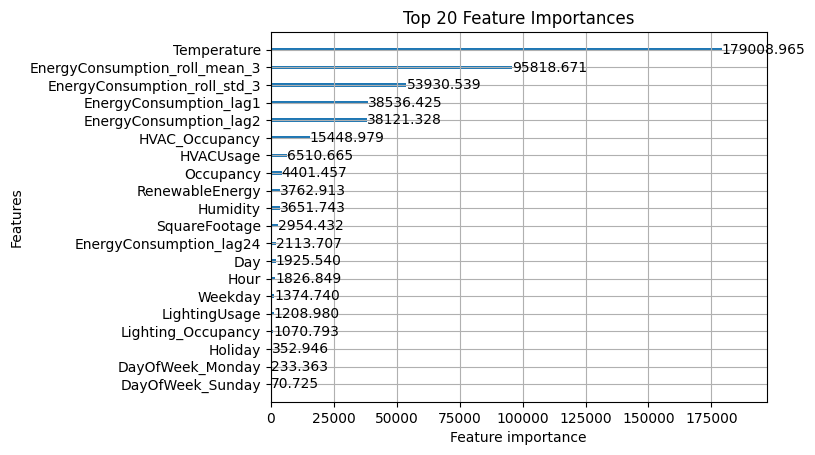

In [ ]:
import matplotlib.pyplot as plt

lgb.plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Feature Importances")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Predictions already computed as y_pred
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
mae = mean_absolute_error(y_test, y_pred)
mbe = np.mean(y_test - y_pred)   # Mean Bias Error
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("🔎 LightGBM Model Evaluation")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE  (Mean Absolute Error):     {mae:.4f}")
print(f"MBE  (Mean Bias Error):         {mbe:.4f}")
print(f"R²   (Coefficient of Determination): {r2:.4f}")
print(f"EVS  (Explained Variance Score):     {evs:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

🔎 LightGBM Model Evaluation
RMSE (Root Mean Squared Error): 2.3154
MAE  (Mean Absolute Error):     1.7091
MBE  (Mean Bias Error):         0.3082
R²   (Coefficient of Determination): 0.9124
EVS  (Explained Variance Score):     0.9140
MAPE (Mean Absolute Percentage Error): 2.19%


# Task
Update the model comparison table (`results_df`) with the LightGBM model's performance metrics (MAE, MSE, R2). Then, create three bar charts to visualize and compare the MAE, MSE, and R2 scores of all models (Naive, Random Forest, Gradient Boosting, Prophet, LSTM, LightGBM). Finally, provide a summary of the overall performance, identifying the best model and key insights.

## Update Model Comparison Table

### Subtask:
Add the performance metrics (MAE, MSE, R2) of the LightGBM model to the existing comparison table (results_df) that contains metrics for Naive, Random Forest, Gradient Boosting, Prophet, and LSTM.


**Reasoning**:
To update the model comparison table, I need to create a new dictionary with LightGBM's metrics, convert it to a DataFrame, and then concatenate it with the existing results_df.



In [ ]:
lgbm_results = {
    'Model': ['LightGBM'],
    'MAE': [mae],
    'MSE': [mse],
    'R2': [r2]
}
lgbm_results_df = pd.DataFrame(lgbm_results)

results_df = pd.concat([results_df, lgbm_results_df], ignore_index=True)

print("\nUpdated Comparison of Models:")
print(results_df.round(4))


Updated Comparison of Models:
               Model     MAE       MSE      R2
0              Naive  9.3819  131.1745 -0.9882
1      Random Forest  2.7383   11.8954  0.8057
2  Gradient Boosting  1.8257    6.1959  0.8988
3            Prophet  6.3876   61.7532 -0.0089
4               LSTM  3.0136   13.8848  0.7732
5           LightGBM  1.7091    5.3613  0.9124


## Visualize and Compare Model Performance

### Subtask:
Create three bar charts to visualize and compare the MAE, MSE, and R2 scores of all models (Naive, Random Forest, Gradient Boosting, Prophet, LSTM, LightGBM).

**Reasoning**:
Now that the comparison table is updated with all model metrics, I will generate the first bar chart to visualize the Mean Absolute Error (MAE) for all models, allowing for a direct comparison of their average prediction error.



/tmp/ipython-input-3083750908.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')


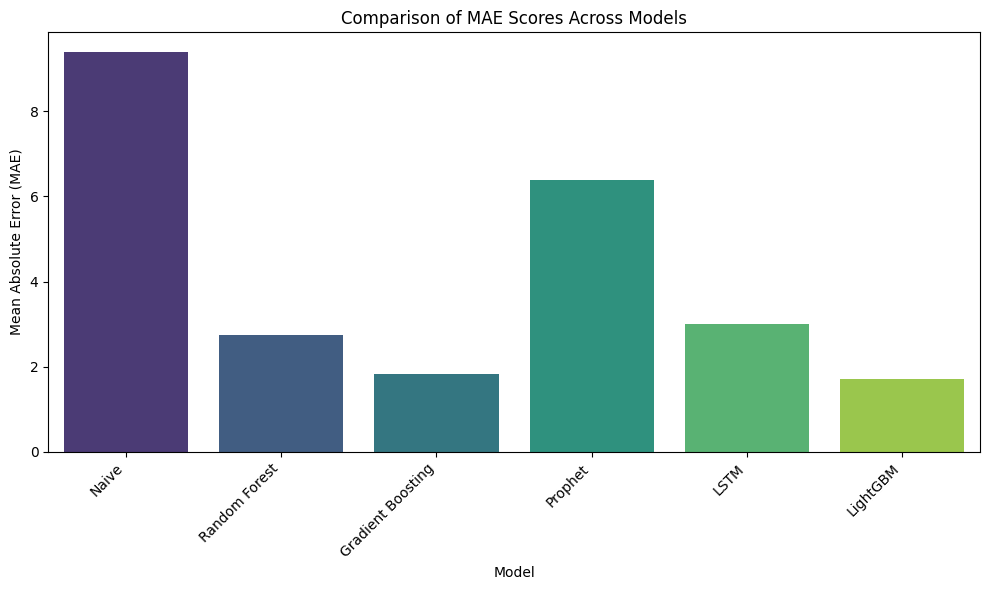

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Comparison of MAE Scores Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` related to `palette` usage in `sns.barplot`. To resolve this and ensure compatibility with future Seaborn versions, I will explicitly assign the 'Model' column to the `hue` parameter and set `legend=False` as suggested by the warning.



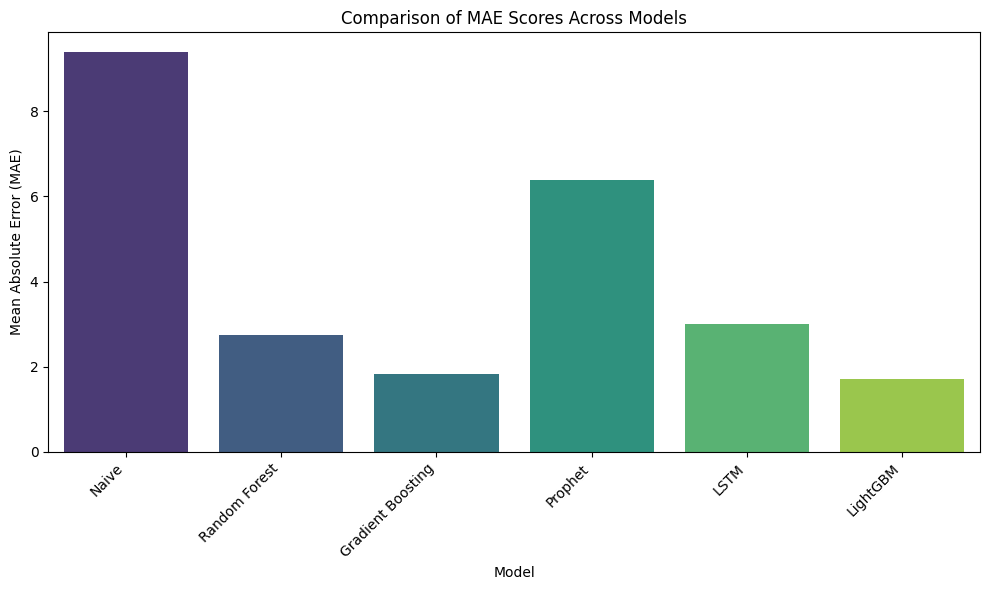

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis', hue='Model', legend=False)
plt.title('Comparison of MAE Scores Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Now that the MAE comparison chart has been addressed, I will generate the second bar chart to visualize the Mean Squared Error (MSE) for all models, which provides insight into the magnitude of errors, penalizing larger errors more.



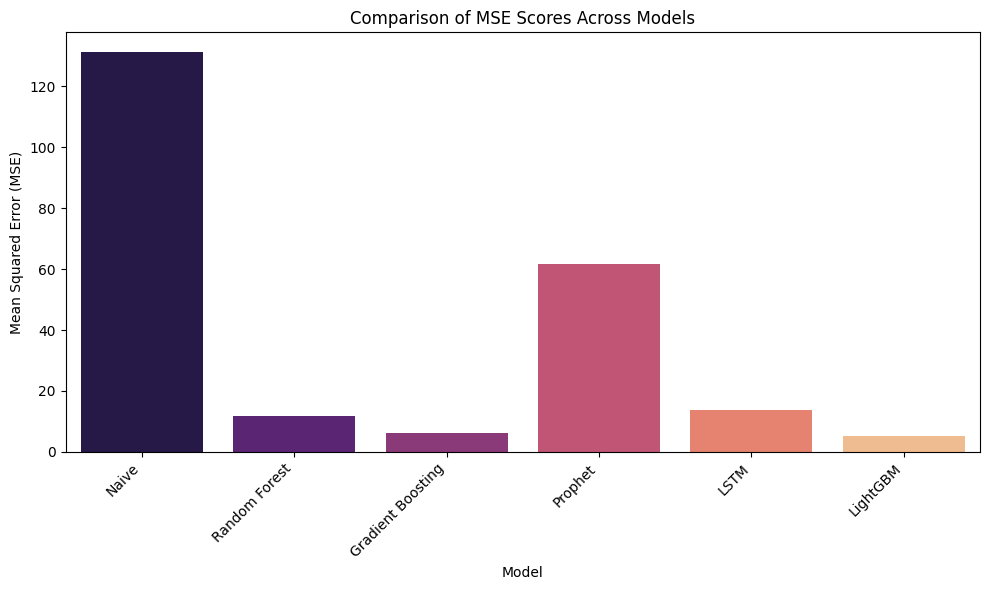

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df, palette='magma', hue='Model', legend=False)
plt.title('Comparison of MSE Scores Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Now that MAE and MSE charts are created, I will generate the third bar chart to visualize the R2 scores for all models, which indicates the proportion of variance in the dependent variable that is predictable from the independent variables.



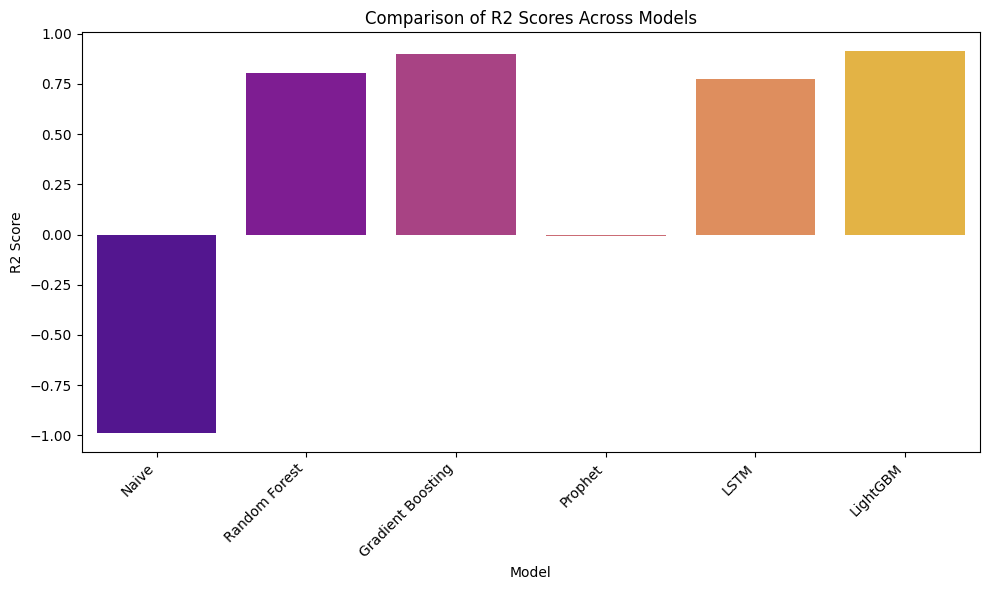

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df, palette='plasma', hue='Model', legend=False)
plt.title('Comparison of R2 Scores Across Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()